In [4]:
# A nearest neighbor learning algorithm example using TensorFlow library.
# This example is using the MNIST database of handwritten digits
# (http://yann.lecun.com/exdb/mnist/)

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [5]:
import numpy as np
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## The Nearest Neighbor (k = 1)

In [34]:
# In this example, we limit mnist data
Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing

# tf Graph Input
## As each of the image is 28X28, the image is a vector in the 784 dimensional space
## None means the xtr can hold arbitrary values
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
# Prediction: Get min distance index (Nearest neighbor)
pred = tf.arg_min(distance, 0)

accuracy = 0.

# Initializing the variables
init = tf.global_variables_initializer()

In [35]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    # loop over test data
    for i in range(len(Xte)):
        
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i, :]})

        # Get nearest neighbor class label and compare it to its true label
        print "Test", i, "Prediction:", np.argmax(Ytr[nn_index]), \
            "True Class:", np.argmax(Yte[i])
            
        # Calculate accuracy
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print "Done!"
    print "Accuracy:", accuracy

Test 0 Prediction: 7 True Class: 7
Test 1 Prediction: 8 True Class: 8
Test 2 Prediction: 5 True Class: 5
Test 3 Prediction: 8 True Class: 8
Test 4 Prediction: 2 True Class: 2
Test 5 Prediction: 5 True Class: 5
Test 6 Prediction: 9 True Class: 9
Test 7 Prediction: 7 True Class: 7
Test 8 Prediction: 8 True Class: 8
Test 9 Prediction: 5 True Class: 5
Test 10 Prediction: 4 True Class: 4
Test 11 Prediction: 5 True Class: 5
Test 12 Prediction: 2 True Class: 2
Test 13 Prediction: 3 True Class: 3
Test 14 Prediction: 6 True Class: 6
Test 15 Prediction: 8 True Class: 8
Test 16 Prediction: 2 True Class: 2
Test 17 Prediction: 9 True Class: 9
Test 18 Prediction: 4 True Class: 4
Test 19 Prediction: 5 True Class: 5
Test 20 Prediction: 5 True Class: 5
Test 21 Prediction: 0 True Class: 0
Test 22 Prediction: 3 True Class: 3
Test 23 Prediction: 5 True Class: 5
Test 24 Prediction: 8 True Class: 8
Test 25 Prediction: 1 True Class: 1
Test 26 Prediction: 9 True Class: 9
Test 27 Prediction: 1 True Class: 1
Te

## K Nearest Neighbors

In [40]:
#placeholders for variable to be used in model
xtr=tf.placeholder(tf.float32,[None,784]) #traning input
ytr=tf.placeholder(tf.float32,[None,10]) #traning label
xte=tf.placeholder(tf.float32,[784]) #testing input

#K-near
K=100 #how many neighbors
nearest_neighbors=tf.Variable(tf.zeros([K]))

#model
distance = tf.negative(tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte)))\
                                     , reduction_indices=1))
# distance = tf.negative(tf.reduce_sum(tf.abs(tf.subtract(xtr, xte)),axis=1)) #L1

# the negitive above if so that top_k can get the lowest distance *_* its a really good hack i learned
values,indices=tf.nn.top_k(distance,k=K,sorted=False)

#a normal list to save
nn = []
for i in range(K):
    nn.append(tf.argmax(ytr[indices[i]], 0)) #taking the result indexes

#saving list in tensor variable
nearest_neighbors=nn
# this will return the unique neighbors the count will return the most common's index
y, idx, count = tf.unique_with_counts(nearest_neighbors)

pred = tf.slice(y, begin=[tf.argmax(count, 0)], size=tf.constant([1], dtype=tf.int64))[0]
# this is tricky count returns the number of repetation in each elements of y and then by begining from that and size begin 1
# it only returns that neighbors value : for example
# suppose a is array([11,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  4,  4,  4,  4]) so unique_with_counts of a will
#return y= (array([ 1,  2,  3,  4, 11]) count= array([3, 3, 2, 7, 1])) so argmax of count will be 3 which will be the
#index of 4 in y which is the hight number in a

#setting accuracy as 0
accuracy=0

#initialize of all variables
init=tf.global_variables_initializer()


In [41]:

#start of tensor session
with tf.Session() as sess:

    for i in range(Xte.shape[0]):
        #return the predicted value
        predicted_value=sess.run(pred,feed_dict={xtr:Xtr,ytr:Ytr,xte:Xte[i,:]})

        print("Test",i,"Prediction",predicted_value,"True Class:",np.argmax(Yte[i]))

        if predicted_value == np.argmax(Yte[i]):
            # if the prediction is right then a double value of 1./200 is added 200 here is the number of test
                accuracy += 1. / len(Xte)
    writer = tf.summary.FileWriter('./graphs',sess.graph)
    writer.close()
    # tensorboard --logdir="./graphs" --port 6006 in command promt to see the graph at localhost:6006
    print("Calculation completed ! ! ")
    print(K,"-th neighbors' Accuracy is:",accuracy)

('Test', 0, 'Prediction', 7, 'True Class:', 7)
('Test', 1, 'Prediction', 6, 'True Class:', 8)
('Test', 2, 'Prediction', 5, 'True Class:', 5)
('Test', 3, 'Prediction', 8, 'True Class:', 8)
('Test', 4, 'Prediction', 1, 'True Class:', 2)
('Test', 5, 'Prediction', 5, 'True Class:', 5)
('Test', 6, 'Prediction', 9, 'True Class:', 9)
('Test', 7, 'Prediction', 7, 'True Class:', 7)
('Test', 8, 'Prediction', 8, 'True Class:', 8)
('Test', 9, 'Prediction', 5, 'True Class:', 5)
('Test', 10, 'Prediction', 4, 'True Class:', 4)
('Test', 11, 'Prediction', 5, 'True Class:', 5)
('Test', 12, 'Prediction', 2, 'True Class:', 2)
('Test', 13, 'Prediction', 3, 'True Class:', 3)
('Test', 14, 'Prediction', 6, 'True Class:', 6)
('Test', 15, 'Prediction', 8, 'True Class:', 8)
('Test', 16, 'Prediction', 1, 'True Class:', 2)
('Test', 17, 'Prediction', 9, 'True Class:', 9)
('Test', 18, 'Prediction', 4, 'True Class:', 4)
('Test', 19, 'Prediction', 5, 'True Class:', 5)
('Test', 20, 'Prediction', 6, 'True Class:', 5)
('

('Test', 180, 'Prediction', 1, 'True Class:', 2)
('Test', 181, 'Prediction', 7, 'True Class:', 7)
('Test', 182, 'Prediction', 9, 'True Class:', 9)
('Test', 183, 'Prediction', 4, 'True Class:', 4)
('Test', 184, 'Prediction', 9, 'True Class:', 4)
('Test', 185, 'Prediction', 9, 'True Class:', 4)
('Test', 186, 'Prediction', 1, 'True Class:', 1)
('Test', 187, 'Prediction', 9, 'True Class:', 4)
('Test', 188, 'Prediction', 9, 'True Class:', 4)
('Test', 189, 'Prediction', 5, 'True Class:', 5)
('Test', 190, 'Prediction', 7, 'True Class:', 9)
('Test', 191, 'Prediction', 5, 'True Class:', 5)
('Test', 192, 'Prediction', 5, 'True Class:', 5)
('Test', 193, 'Prediction', 5, 'True Class:', 5)
('Test', 194, 'Prediction', 3, 'True Class:', 3)
('Test', 195, 'Prediction', 0, 'True Class:', 0)
('Test', 196, 'Prediction', 6, 'True Class:', 6)
('Test', 197, 'Prediction', 9, 'True Class:', 9)
('Test', 198, 'Prediction', 3, 'True Class:', 3)
('Test', 199, 'Prediction', 1, 'True Class:', 2)
Calculation complete

### Plot the accuracy for kNN from k = 1 to k = 100

In [58]:
import matplotlib.pyplot as plt
k_values = 100
accuracy_matrix = []
k_values_matrix = []

#model
distance = tf.negative(tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte)))\
                                     , reduction_indices=1))

for K in range(1,k_values,2):
    
    nearest_neighbors=tf.Variable(tf.zeros([K]))

    # the negitive above if so that top_k can get the lowest distance *_* its a really good hack i learned
    values,indices=tf.nn.top_k(distance,k=K,sorted=False)

    #a normal list to save
    nn = []
    for i in range(K):
        nn.append(tf.argmax(ytr[indices[i]], 0)) #taking the result indexes

    #saving list in tensor variable
    nearest_neighbors=nn
    # this will return the unique neighbors the count will return the most common's index
    y, idx, count = tf.unique_with_counts(nearest_neighbors)

    pred = tf.slice(y, begin=[tf.argmax(count, 0)], size=tf.constant([1], dtype=tf.int64))[0]
    # this is tricky count returns the number of repetation in each elements of y and then by begining from that and size begin 1
    # it only returns that neighbors value : for example
    # suppose a is array([11,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  4,  4,  4,  4]) so unique_with_counts of a will
    #return y= (array([ 1,  2,  3,  4, 11]) count= array([3, 3, 2, 7, 1])) so argmax of count will be 3 which will be the
    #index of 4 in y which is the hight number in a

    #setting accuracy as 0
    accuracy=0

    #initialize of all variables
    init=tf.global_variables_initializer()



    #start of tensor session
    with tf.Session() as sess:


        for i in range(Xte.shape[0]):
            #return the predicted value
            predicted_value=sess.run(pred,feed_dict={xtr:Xtr,ytr:Ytr,xte:Xte[i,:]})

            # print("Test",i,"Prediction",predicted_value,"True Class:",np.argmax(Yte[i]))

            if predicted_value == np.argmax(Yte[i]):
                # if the prediction is right then a double value of 1./200 is added 200 here is the number of test
                    accuracy += 1. / len(Xte)
        writer = tf.summary.FileWriter('./graphs',sess.graph)
        writer.close()
        print(K,"-th neighbors' Accuracy is:",accuracy)

        k_values_matrix.append(K)
        accuracy_matrix.append(accuracy) 

# tensorboard --logdir="./graphs" --port 6006 in command promt to see the graph at localhost:6006
print("Calculation completed ! ! ")
print accuracy_matrix

(1, "-th neighbors' Accuracy is:", 0.9600000000000007)
(3, "-th neighbors' Accuracy is:", 0.9500000000000007)
(5, "-th neighbors' Accuracy is:", 0.9400000000000007)
(7, "-th neighbors' Accuracy is:", 0.9200000000000007)
(9, "-th neighbors' Accuracy is:", 0.9200000000000007)
(11, "-th neighbors' Accuracy is:", 0.9150000000000007)
(13, "-th neighbors' Accuracy is:", 0.9200000000000007)
(15, "-th neighbors' Accuracy is:", 0.9050000000000007)
(17, "-th neighbors' Accuracy is:", 0.9100000000000007)
(19, "-th neighbors' Accuracy is:", 0.8950000000000007)
(21, "-th neighbors' Accuracy is:", 0.9000000000000007)
(23, "-th neighbors' Accuracy is:", 0.9000000000000007)
(25, "-th neighbors' Accuracy is:", 0.8900000000000007)
(27, "-th neighbors' Accuracy is:", 0.8950000000000007)
(29, "-th neighbors' Accuracy is:", 0.8850000000000007)
(31, "-th neighbors' Accuracy is:", 0.8900000000000007)
(33, "-th neighbors' Accuracy is:", 0.8800000000000007)
(35, "-th neighbors' Accuracy is:", 0.885000000000000

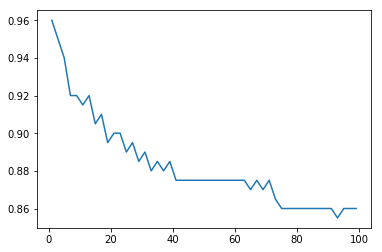

In [59]:
k_values_matrix = []
for K in range(1,k_values,2):
    k_values_matrix.append(K)
plt.plot(np.asarray(k_values_matrix),np.asarray(accuracy_matrix))
plt.show()